In [1]:
import pyPCG as pcg
import pyPCG.io as signal_io
%matplotlib inline

In [2]:
data, fs = signal_io.read_signal_file("example.wav","wav")
example = pcg.pcg_signal(data,fs)

In [3]:
norm = pcg.process_pipeline(pcg.zero_center,pcg.unit_scale)
normd = norm.run(example)

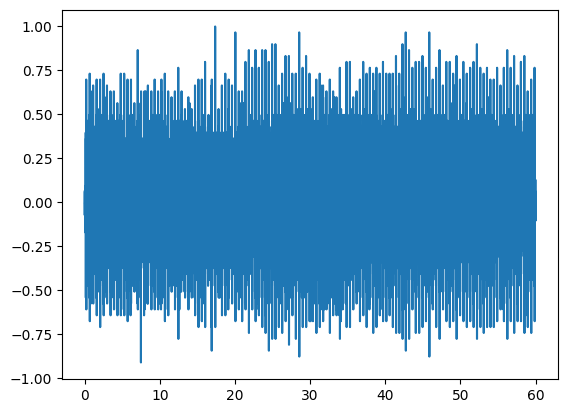

In [4]:
pcg.plot(normd)

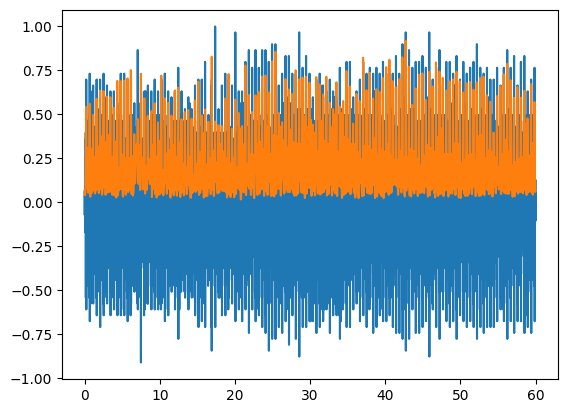

In [5]:
import pyPCG.preprocessing as preproc

h_env = preproc.homomorphic(normd)
pcg.plot(normd)
pcg.plot(h_env)

['Zero center', 'Unit scale', 'LP Filter (order-6, cut-100)', 'HP Filter (order-6, cut-20)']


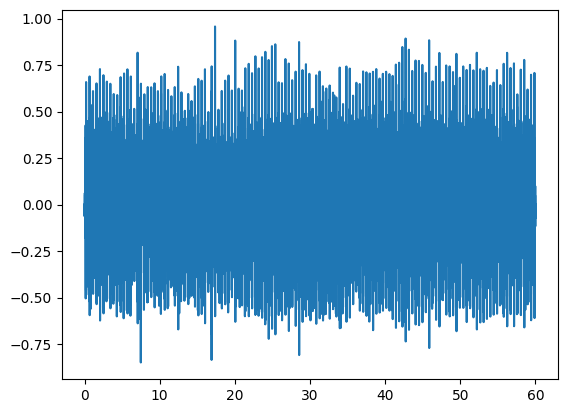

In [6]:
BP_filterd = preproc.filter(preproc.filter(normd,6,100,"LP"),6,20,"HP")
pcg.plot(BP_filterd)
print(BP_filterd.processing_log)

['Zero center', 'Unit scale', 'Wavelet denoise (family-coif4, level-5, th-0.2)', 'Homomorphic envelope (order-6,cut-8)']


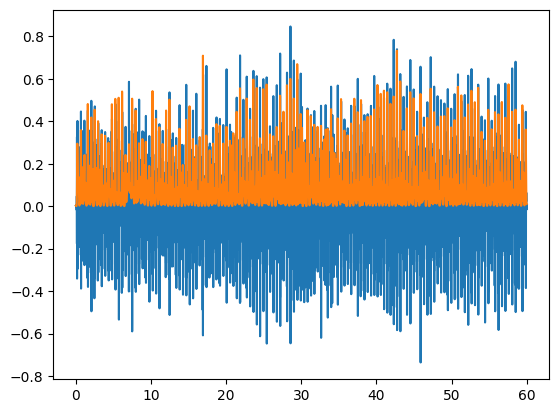

In [7]:
WT_den = preproc.wt_denoise(normd)
h_wt = preproc.homomorphic(WT_den)
pcg.plot(WT_den)
pcg.plot(h_wt)
print(h_wt.processing_log)

['Zero center', 'Unit scale', 'LP Filter (order-6, cut-100)', 'HP Filter (order-6, cut-20)', 'Wavelet denoise (family-coif4, level-5, th-0.2)', 'Homomorphic envelope (order-6,cut-8)']


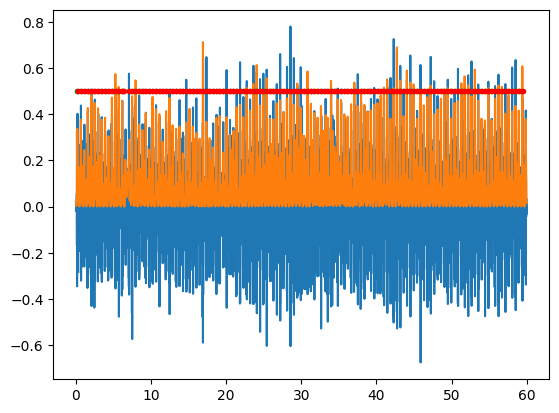

In [8]:
import pyPCG.segment as sgm
import numpy as np
import matplotlib.pyplot as plt
wt_bp = preproc.wt_denoise(BP_filterd)
h_bp = preproc.homomorphic(wt_bp)
print(h_bp.processing_log)
_, peaks = sgm.adv_peak(h_bp)
s1,_ = sgm.peak_sort_diff(peaks)
st,en = sgm.segment_peaks(s1,h_bp)
pcg.plot(wt_bp)
pcg.plot(h_bp)
# plt.plot(peaks/h_bp.fs,np.ones_like(peaks)*0.5,'.')
plt.plot(st/h_bp.fs,np.ones_like(st)*0.5,'g.')
plt.plot(en/h_bp.fs,np.ones_like(en)*0.5,'r.')

In [42]:
def twin_plot(x1,y1,x2,y2):
    fig, ax1 = plt.subplots()
    if len(x1)==0:
        ax1.plot(y1)
    else:
        ax1.plot(x1,y1)
    ax1.tick_params(axis='y',labelcolor='tab:blue')
    ax2 = ax1.twinx()
    if len(x2)==0:
        ax2.plot(y2)
    else:
        ax2.plot(x2, y2, color='tab:orange')
    ax2.tick_params(axis='y',labelcolor='tab:orange')

133 133


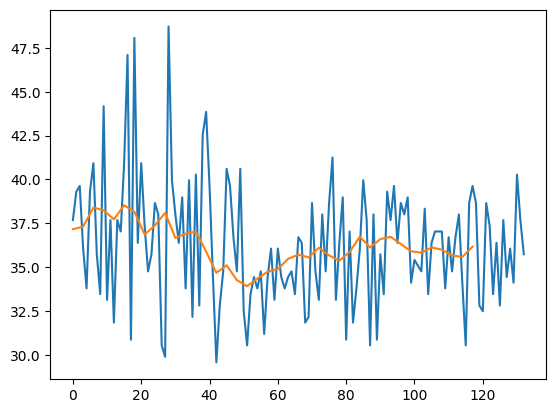

In [69]:
import pyPCG.features as ftr
import pyPCG.stats as stats

print(len(st),len(en))
test_ftr = ftr.time_delta(st,en,h_bp)
test_ftr = ftr.ramp_time(st,en,h_bp)
# ftr.ramp_time(st,en,h_bp,type="exit")
test_ftr = ftr.zero_cross_rate(st,en,wt_bp)
# ftr.peak_width(st,en,h_bp,factor=0.8) #convert to ms?
# ftr.peak_centroid(st,en,h_bp)
test_ftr,_ = ftr.max_freq(st,en,wt_bp,nfft=1024)
# ftr.spectral_width(st,en,wt_bp,nfft=1024) #convert to Hz?
temp = ftr.spectral_centroid(st,en,wt_bp,nfft=1024)
test_ftr = np.array(temp)

m = stats.mean(test_ftr)
# trim = stats.trim_transform(test_ftr,5)
# trim = stats.outlier_remove_transform(test_ftr)
# print(len(test_ftr),len(trim))
loc, win = stats.window_operator(test_ftr[0,:],15,stats.mean,0.8)
plt.plot(test_ftr[0,:])
plt.plot(loc,win)